# SVM概述

SVM是一種二分類模型，它與感知機的概念相似，都是希望能在訓練樣本集$T=\{(X_{1}, y_{1}),(X_{2}, y_{2}), \cdots,(X_{N}, y_{N})\}$，上找到一個超平面$w^* \cdot X + b^*=0$來分類樣本，其中，$X_i=(x_{i}^{(1)}, x_{i}^{(2)}, ......, x_{i}^{(k)})^T$，$y_i \in \{-1,+1\}$，$w=(w_1,w_2,\cdots,w_k)$。不同於感知機，SVM希望找到的是能「最大化最小間隔的超平面」，直觀的理解就是SVM能做到是不僅能將樣本正確分類，並且對於那些很難被分類的樣本、距離超平面最近的樣本（最小間隔）都距離超平面有足夠大的距離，表示說分類的效果足夠好；其中，參數$w^*,b^*$的求解是透過優化問題來求解的，求出超平面後再透過決策函數$sign(w^* \cdot X + b^*)$來預測分類。

$$
\operatorname{sign}(z)=\left\{\begin{array}{ll}{+1,} & {z \geqslant 0} \\ {-1,} & {z<0}\end{array}\right.
$$

在SVM當中根據模型假設的不同又可以分為硬間隔線性SVM、軟間隔線性SVM以及非線性核函數SVM。<br>


# 硬間隔線性SVM
硬間隔線性SVM的前提是，假設資料是「線性可分的」，不過通常現實的資料都並非如此，不過硬間隔線性SVM是該模型的基礎，因此還是有必要了解的，上述提到了多次間隔，間隔的計算又分為兩種，函數間隔與幾何間隔，上面所提到的間隔指的是幾何間隔。

## 幾何間隔與函數間隔
幾何間隔即是樣本點到超平面的實際距離，SVM的目標是希望在特徵空間中找到某個超平面$w\cdot X_i+b=0$，該平面能正確的分類所有訓練樣本，給定某個訓練樣本點$(X_i,y_i)$，其中，特徵$X_i=(x_{i}^{(1)}, x_{i}^{(2)}, ......, x_{i}^{(k)})^T$，類別$y_i \in \{-1,+1\}$，樣本點$X_i$到超平面$w\cdot X_i+b=0$幾何間隔$\gamma_i$可以表示為：

$$
\gamma_i=\frac{|w\cdot X_i+b|}{||w||}
$$

其中，$||w||$為法向量$w$的L2範數；而SVM找到的那個超平面能將所有訓練樣本正確分類，這表示$y_i$和$w\cdot X_i+b$必然同號，因此我們可以進一步地把幾何間隔表示為：

$$
\gamma_i=\frac{y_i(w\cdot X_i+b)}{||w||}
$$

而該式的分子$y_i(w\cdot X_i+b)$其實就是函數間隔，以$\hat \gamma_i $表示，觀察$\hat \gamma_i$與$\gamma_i$間的關係可發現，當$(w,b)$改變為$(\lambda w, \lambda b)$，函數間隔也會變為$\lambda \hat \gamma_i$，而幾何間隔$\gamma_i$仍然是固定不變的，透過兩者的關係能簡化構建出SVM的優化問題。

## 優化問題
前面所說SVM的目標是，在把所有訓練樣本正確分類的情況下，找到一個超平面，且距離超平面最近的樣本與超平面間的幾何間隔是所有可行的平面中最大的，優化問題可以表示為：

$$
\arg \max_{w,b} \;\; \gamma=\frac{\hat \gamma}{||w||}
$$

$$
s.t. \quad \frac{y_i(w\cdot X_i+b)}{||w||}\geqslant \frac{\hat \gamma}{||w||}, \quad i=1,2, \cdots, N
$$

而根據上小節提到的我們可以自由的調整$(w,b)$的比例，來讓函數間隔$\hat \gamma$有彈性且同時不影響幾何間隔$\gamma$的結果，因此我們可以將優化問題中的函數間隔調整為$\hat \gamma=1 $，將優化問題簡化為：

$$
\arg \max_{w,b} \;\; \gamma=\frac{1}{||w||}
$$

$$
s.t. \quad y_i(w\cdot X_i+b)\geqslant 1, \quad i=1,2, \cdots, N
$$

接著進一步將極大化問題轉為極小化問題，並將目標式轉為二次式（$\frac{1}{2}$是為了後續微分方便設置的），得到個二次凸規劃問題，其特性為局部最優解即是全局最優解：

$$
\arg \min_{w,b} \;\; \frac{1}{2}||w||^2  \tag{1}
$$

$$
s.t. \quad 1-y_i(w\cdot X_i+b)\leq 0, \quad i=1,2, \cdots, N
$$

接著我們將上述的約束問題引入Lagrange multiplier轉為以下對於$w$的無約束問題：

$$
\min_{w,b} \max_{\alpha} \mathcal{L}(w,b,\alpha)=\frac{1}{2}||w||^2+\sum_{i=1 }^{N}\alpha_i \left(1-y_i(w\cdot X_i+b)\right)=P^* \tag{2}
$$

$$s.t. \quad \alpha_i \geq 0$$

其中，要求$\alpha_i \geq 0$，該要求是為了使（1）式中的約束問題在任意的狀況下，即使不滿足約束條件
$$\{ 1-y_i(w\cdot X_i+b)\leq 0 , \quad i=1,2, \cdots, N \}$$
都等價於Lagrange無約束問題，也就是使得$\max_{\alpha}\mathcal{L}(w,b,\alpha)=\frac{1}{2}||w||^2$；不過往往原始問題相對較不好求解（應該說對偶問題更容易求解），通常會將其轉為對偶問題，先求解$w,b$再求解$\alpha_i$是較佳的選擇。

## 對偶問題
為了方便求解我們可以將原問題轉為以下對偶問題：

$$
\max_{\alpha} \min_{w,b} \mathcal{L}(w,b,\alpha)=\frac{1}{2}||w||^2+\sum_{i=1 }^{N}\alpha_i \left(1-y_i(w\cdot X_i+b)\right)=D^*
$$
$$s.t. \quad \alpha_i \geq 0$$

不過，對偶問題的解$D^*$與原問題的解$P^*$之間的關係為$P^* \geqslant D^*$；當$P^*=D^*$稱滿足強對偶關係，也是我們希望的，因此如何確定我們透過對偶問題求出來的解就等於原問題的解，我們需要引入以下其他概念與條件：<br>
（在此直接給出結論，忽略數學證明，因為我也沒有辦法以很嚴謹的方式表達清楚。）<br>

「對於一個凸優化問題，它若滿足slater條件，它必定也滿足強對偶關係，而滿足強對偶關係，則最優解必滿足KKT條件。」<br>
「而SVM的優化問題是個凸二次規劃問題，它必滿足slater條件。」<br>

跟據上述的結論，提供我們一個求解的過程：<br>

1:我們已知SVM的優化問題必滿足強對偶。
2:我們可以透過對偶問題來求解原問題。
3:求解可由KKT條件來幫助求解。<br>

在SVM的框架下，KKT條件有以下條件：
$$
1-y_i(w\cdot X_i+b)\leq 0, \quad i=1,2, \cdots, N \tag{3}
$$
$$
\nabla_w \mathcal{L}(w,b,\alpha)=0 \tag{4}
$$
$$
\nabla_b \mathcal{L}(w,b,\alpha)=0 \tag{5}
$$
$$
\alpha_i  \geq 0 \tag{6}
$$
$$
\alpha_i (1-y_i(w\cdot X_i+b))=0 \tag{7}
$$

其中，（3）條件為原問題可行條件，（4）（5）（6）條件為對偶問題可行條件，（7）稱為互補鬆弛條件，該條件比較特別同時也是求解的關鍵。

對偶問題求解過程：
$$
\max_{\alpha} \min_{w,b} \mathcal{L}(w,b,\alpha)=\frac{1}{2}||w||^2+\sum_{i=1 }^{N}\alpha_i \left(1-y_i(w\cdot X_i+b)\right) \tag{8}
$$
$$s.t. \quad \alpha_i \geq 0$$ 



$$
\nabla_w \mathcal{L}=0 \Rightarrow w=\sum_{i=1}^{N}\alpha_i y_i X_i \tag{9}
$$
$$
\nabla_b \mathcal{L}=0 \Rightarrow \sum_{i=1}^{N}\alpha_i y_i=0 \tag{10}
$$

將（9）（10）式結果代回$\mathcal{L}(w,b,\alpha)$，整理將得到極大化問題：
$$\begin{align} \max_{\alpha}\mathcal{L}(\alpha)&=\frac{-1}{2}\sum_{i=1}^{N}\sum_{j=1}^{N} \alpha_i\alpha_jy_iy_jX_{i}^T X_j+\sum_{i=1}^{N}\alpha_i
\\ 
s.t. & \quad \alpha_i \geq 0 \\
& \quad \sum_{i=1}^{N}\alpha_i y_i=0
\end{align}
$$

我們的最終目標即是求解$w^*$與$b^*$，接著我們透過優化算法（梯度下降法、牛頓法、SMO算法等等）求出$\alpha_i ^*$，再將$\alpha_i ^*$代回（9）式得到$$w^*=\sum_{i=1}^{N}\alpha_i^*y_iX_i\tag{11}$$ 

而在求解$\alpha_i$的過程中，我們可以由KKT條件當中的第（7）式來大大簡化計算，我們知道最優解必滿足

$$\alpha_i^*(1-y_i(w^* \cdot X_i+b^*))=0$$

如果$\alpha_i^*$全為0，根據（11）式，此時$w^*$為0向量，代表找不到超平面，顯然不合理。而$\alpha_i^*$又必須滿足$\alpha_i ^*\geq 0$，因此，必存在某些$\alpha_j^*>0$且還能滿足$\alpha_j^* (1-y_j(w^* \cdot X_j+b^*))=0$，那只能是$1-y_j(w^* \cdot X_j+b^*)=0$，這意味著那些$\alpha_j^*>0$的情況只發生在支持向量上（滿足不等式約束中等式部分的樣本、和超平面幾何間隔剛好為1的樣本），進一步代表$w^*$向量的計算中只需由那些支持向量的樣本計算就好，幾何間隔超過1的樣本與$w^*$向量的計算無關。

最後，有了$w^*$後，透過$1-y_j(w^* \cdot X_j+b^*)=0$可以求解$b^*$，得到：

$$
\begin{align}
b^* &= \frac{1}{y_j}-w^*\cdot X_j \\
&= \frac{1}{y_j}-\sum_{i=1}^{N}\alpha_i^* y_i (X_i^T  X_j)\\
&= y_j-\sum_{i=1}^{N}\alpha_i^* y_i (X_i^T  X_j)
\end{align}
$$

$b^*$也只和支持向量有關

# 軟間隔線性SVM

更多時候，真實數據並非線性可分的，意即原問題中某些樣本不滿足幾何間隔大於等於1約束條件，這當中包含：
1. 在間隔中分類正確的樣本
2. 在間隔中分類不正確的樣本
3. 在間隔外分類不正確的樣本 
4. 剛好落在超平面上的樣本<br>

這時候就需要讓優化問題中的約束條件更有彈性，又稱為軟間隔最大化，它的做法是在樣本上加入一個鬆弛變量$\xi_i$來讓那些不滿足約束條件的樣本都滿足幾何間隔大於等於1，這使得原問題變成：

$$
\arg \min_{w,b} \;\; \frac{1}{2}||w||^2  + C \sum_{i=1}^{N}\xi_i \tag{12}
$$

$$
s.t. \quad 1-\xi_i-y_i(w\cdot X_i+b)\leq 0 ,\quad i=1,2, \cdots, N
$$
$$
0 \leq \xi_i ,\quad i=1,2, \cdots, N
$$
其中，$C \geq 0$它所代表的是對於「錯誤分類的樣本」以及「正確分類但若不加入鬆弛變量$\xi_i$則不滿足不等式的樣本」的懲罰，$C$越大，表示能容忍上述錯誤的程度越小。

我們接著將約束優化問題寫成對於$\xi_i, w, b$的無約束優化問題：

$$
\min_{w,b,\xi} \max_{\alpha,\mu} \mathcal{L}(w,b,\xi,\alpha,\mu)=\frac{1}{2}||w||^2+ C \sum_{i=1}^{N}\xi_i +\sum_{i=1 }^{N}\alpha_i \left(1-\xi_i-y_i(w\cdot X_i+b)\right)+\sum_{i=1}^{N}\mu_i(-\xi_i) =P^* \tag{13}
$$

$$s.t. \quad \alpha_i \geq 0$$
$$ \quad \quad \mu_i \geq 0$$


我們可以透過強對偶關係以及KKT條件來求最優解，先將其轉為對偶問題：

$$
\max_{\alpha,\mu} \min_{w,b,\xi} \mathcal{L}(w,b,\xi,\alpha,\mu)=\frac{1}{2}||w||^2+ C \sum_{i=1}^{N}\xi_i +\sum_{i=1 }^{N}\alpha_i \left(1-\xi_i-y_i(w\cdot X_i+b)\right)+\sum_{i=1}^{N}\mu_i(-\xi_i) =D^* \tag{14}
$$

$$s.t. \quad \alpha_i \geq 0$$
$$ \quad \quad \mu_i \geq 0$$

對偶問題內部極小化過程：

$$
\nabla_w \mathcal{L}=0 \Rightarrow w=\sum_{i=1}^{N}\alpha_i y_i X_i \tag{15}
$$
$$
\nabla_b \mathcal{L}=0 \Rightarrow \sum_{i=1}^{N}\alpha_i y_i=0 \tag{16}
$$
$$
\nabla_{\xi_i} \mathcal{L} \Rightarrow C-\mu_i-\alpha_i=0 \tag{17}
$$

將（15）（16）（17）式結果帶回（14）式整理得外部極大化問題：

$$\begin{align} \max_{\alpha}\mathcal{L}(\alpha)&=\frac{-1}{2}\sum_{i=1}^{N}\sum_{j=1}^{N} \alpha_i\alpha_jy_iy_jX_{i}^T X_j+\sum_{i=1}^{N}\alpha_i \tag{18}
\\ 
s.t. & \quad \alpha_i \geq 0 \\
& \quad \mu_i \geq 0\\
& \quad \sum_{i=1}^{N}\alpha_i y_i=0\\
& \quad C-\mu_i-\alpha_i=0
\end{align}
$$

我們可以透過KKT條件來幫助求解，在軟間隔SVM的框架下，最優解的KKT條件為：

$$\alpha_i^*(1-\xi_i-y_i(w^* \cdot X_i+b^*))=0$$
$$-\mu_i^*\xi_i^*=0$$
$$w^*=\sum_{i=1}^{N}\alpha_i^* y_i X_i \tag{19}$$
$$1-\xi_i-y_i(w\cdot X_i+b)\leq 0$$
$$\alpha_i^* \geq 0$$
$$\mu_i^* \geq 0$$
$$-\xi_i^* \geq 0$$
$$C-\mu_i^*-\alpha_i^*=0 \tag{20}$$


在（19）條件中，必定存在某些$\alpha_j > 0$使得$w$向量為非0向量才有軟間隔超平面（滿足軟間隔條件），我們將聚焦在那些$\alpha_j > 0$的樣本；
除此之外，我們仍需要找到剛好在邊界上的樣本來便於求解$b^*$，而剛好落在邊界上的樣本$\xi_j=0, \mu_j>0$；再根據（20）條件，可以得到我們要找到那些在邊界上的樣本滿足$0<\alpha_j^*<C$，下標$j$表示該樣本既滿足軟間隔條件又剛好落在邊界上，我們最後就能得到：
$$
b^*=y_j-\sum_{i=1}^{N}\alpha_i^* y_i (X_i^T  X_j)
$$

最後，根據上述，我們知道只要$\alpha_i^* > 0$的樣本就滿足軟間隔條件，這些樣本都可以是支持向量;$0<\alpha_i^*<C$表示該樣本不只滿足軟間隔還剛好落在邊界上；那對於那些$C<\alpha_i^*$的樣本代表什麼意思呢？

首先，$C<\alpha_i^*$的樣本必滿足軟間隔條件，那它又分為三種情況：
1. $0<\xi_i^*<1$ 它代表落在間隔內，正確或錯誤分類的樣本
2. $\xi_i^*=1$ 它代表剛好落在超平面上的樣本 
3. $\xi_i^*>1$ 它代表落在間隔外的錯誤分類樣本

# 非線性核函數SVM
在實際的數據中，很多時候是無法在特徵空間上透過線性的超平面來劃分數據，因此我們需要將數據透過核函數轉到其他空間上才能找到線性超平面，這樣的作法稱為非線性核函數SVM，它與軟間隔線性SVM很類似，只差在我們需要將數據透過核函數轉換到其他空間上，具體作法如下：

1. 選擇一個核函數與懲罰項C，構造出如同（18）式的外部極大化問題（在乘以-1變為極小化問題）

$$
\min_{\alpha}\mathcal{L}(\alpha)=\frac{1}{2}\sum_{i=1}^{N}\sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j K(X_i,X_j)- \sum_{i=1}^{N}\alpha_i 
$$

$$
\begin{align}
s.t. & \quad \alpha_i \geq 0 \\
& \quad \mu_i \geq 0\\
& \quad \sum_{i=1}^{N}\alpha_i y_i=0\\
& \quad C-\mu_i-\alpha_i=0
\end{align}
$$

其中，$K(X_i,X_j)=\psi(X_i)^T \psi(X_j)$，核函數的結果等於將$X$特徵經由$\psi(\cdot)$轉換到其他空間中的內積結果

2. 求解$\alpha ^*=(\alpha_1^*, \alpha_2^*, \cdots, \alpha_N^*)$

3. $w^*=\sum_{i=1}^{N}\alpha_i^* y_i K(\cdot,X_i)$

4. 找出那些$0<\alpha_j^*<C$的樣本，他們不僅是支持向量且剛好落在邊界上

5. $b^*=y_j-\sum_{i=1}^{N}\alpha_i^* y_i K(X_i, X_j)$

6. 當有新的樣本要預測時，建構決策函數來預測$f(X)=sign(\sum_{i=1}^{N}\alpha_i^* y_i K(X,X_i)+b^*)$




# python sklearn實現SVM模型

## 模型參數C
SVM中，C代表的就是在軟間隔SVM中對於鬆弛變量$\xi_i$的懲罰項，C越大表示越不能容忍分類錯誤，容易造成overfitting，下方將以乳腺癌數據，由線性SVM來驗證C與accuracy的關係。

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target
 
X.shape

(569, 30)

In [3]:
# 觀察敘述性統計
data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,14.127292,3.524049,6.981000,8.458360,9.529200,10.260000,11.700000,13.370000,15.780000,19.530000,24.371600,28.11000
1,569.0,19.289649,4.301036,9.710000,10.930400,13.088000,14.078000,16.170000,18.840000,21.800000,24.992000,30.652000,39.28000
2,569.0,91.969033,24.298981,43.790000,53.827600,60.496000,65.830000,75.170000,86.240000,104.100000,129.100000,165.724000,188.50000
3,569.0,654.889104,351.914129,143.500000,215.664000,275.780000,321.600000,420.300000,551.100000,782.700000,1177.400000,1786.600000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.068654,0.075042,0.079654,0.086370,0.095870,0.105300,0.114820,0.132888,0.16340
5,569.0,0.104341,0.052813,0.019380,0.033351,0.040660,0.049700,0.064920,0.092630,0.130400,0.175460,0.277192,0.34540
6,569.0,0.088799,0.079720,0.000000,0.000000,0.004983,0.013686,0.029560,0.061540,0.130700,0.203040,0.351688,0.42680
7,569.0,0.048919,0.038803,0.000000,0.000000,0.005621,0.011158,0.020310,0.033500,0.074000,0.100420,0.164208,0.20120
8,569.0,0.181162,0.027414,0.106000,0.129508,0.141500,0.149580,0.161900,0.179200,0.195700,0.214940,0.259564,0.30400
9,569.0,0.062798,0.007060,0.049960,0.051504,0.053926,0.055338,0.057700,0.061540,0.066120,0.072266,0.085438,0.09744


In [4]:
# 可以由平均數欄位發現特徵與特徵之間的尺度不一致，因此將每個特徵normalize
X = StandardScaler().fit_transform(X)
data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,-3.153111e-15,1.00088,-2.029648,-1.610057,-1.305923,-1.098366,-0.689385,-0.215082,0.469393,1.534446,2.909529,3.971288
1,569.0,-6.568462e-15,1.00088,-2.229249,-1.945253,-1.443165,-1.212786,-0.725963,-0.104636,0.584176,1.326975,2.644095,4.651889
2,569.0,-6.993039e-16,1.00088,-1.984504,-1.571053,-1.296381,-1.076672,-0.691956,-0.235980,0.499677,1.529432,3.037982,3.976130
3,569.0,-8.553985e-16,1.00088,-1.454443,-1.249201,-1.078225,-0.947908,-0.667195,-0.295187,0.363507,1.486075,3.218702,5.250529
4,569.0,6.081447e-15,1.00088,-3.112085,-1.971730,-1.517125,-1.188910,-0.710963,-0.034891,0.636199,1.313694,2.599511,4.770911
5,569.0,-1.136369e-15,1.00088,-1.610136,-1.345369,-1.206849,-1.035527,-0.747086,-0.221940,0.493857,1.347811,3.275782,4.568425
6,569.0,-2.997017e-16,1.00088,-1.114873,-1.114873,-1.052316,-0.943046,-0.743748,-0.342240,0.526062,1.434288,3.300560,4.243589
7,569.0,1.023981e-15,1.00088,-1.261820,-1.261820,-1.116837,-0.974010,-0.737944,-0.397721,0.646935,1.328412,2.973759,3.927930
8,569.0,-1.860648e-15,1.00088,-2.744117,-1.885853,-1.448032,-1.153036,-0.703240,-0.071627,0.530779,1.233221,2.862418,4.484751
9,569.0,-1.504752e-15,1.00088,-1.819865,-1.600987,-1.257643,-1.057477,-0.722639,-0.178279,0.470983,1.342243,3.209454,4.910919


0.9707602339181286 0.21191919191919192


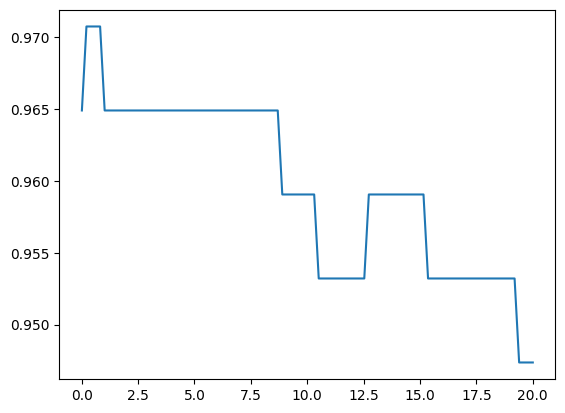

In [7]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=200)
# linear核函數 
score = []
C_ = np.linspace(0.01,20,100)
for i in C_:
    clf = SVC(kernel="linear",C=i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score), C_[score.index(max(score))])
plt.plot(C_,score)
plt.show()

可以發現，隨著C越大，overfitting的狀況也越來越明顯。

## 四種二維類型數據與四種核函數間的關係
本小節將簡單的透過自行建立四種二維類型數據，同時比較在各種數據類型下採用不同kernel的預測表現。
kernel分別採用"linear","sigmoid","rbf","poly"。

In [8]:
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC  
from sklearn.datasets import make_circles, make_moons, make_blobs,make_classification
import numpy as np
import matplotlib.pyplot as plt

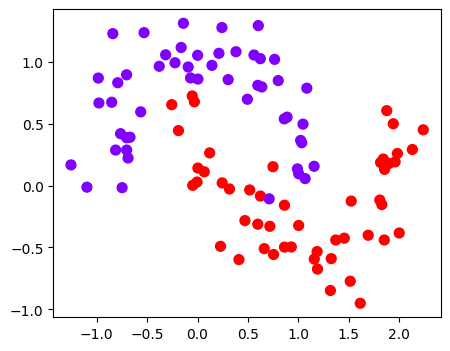

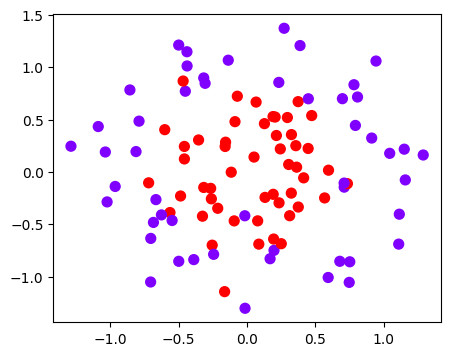

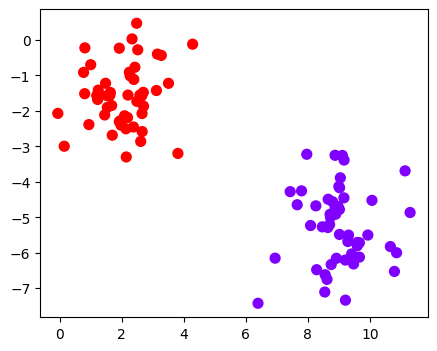

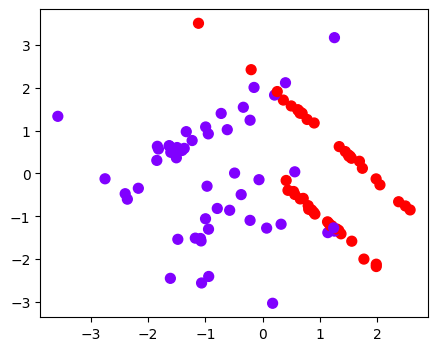

In [9]:
# 建立四組 100筆數據
n_samples = 100
 
datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=200),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=200),
    make_blobs(n_samples=n_samples, centers=2, random_state=200), 
    make_classification(n_samples=n_samples,n_features = 2,n_informative=2,n_redundant=0, random_state=200)
    ]

for X,y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")


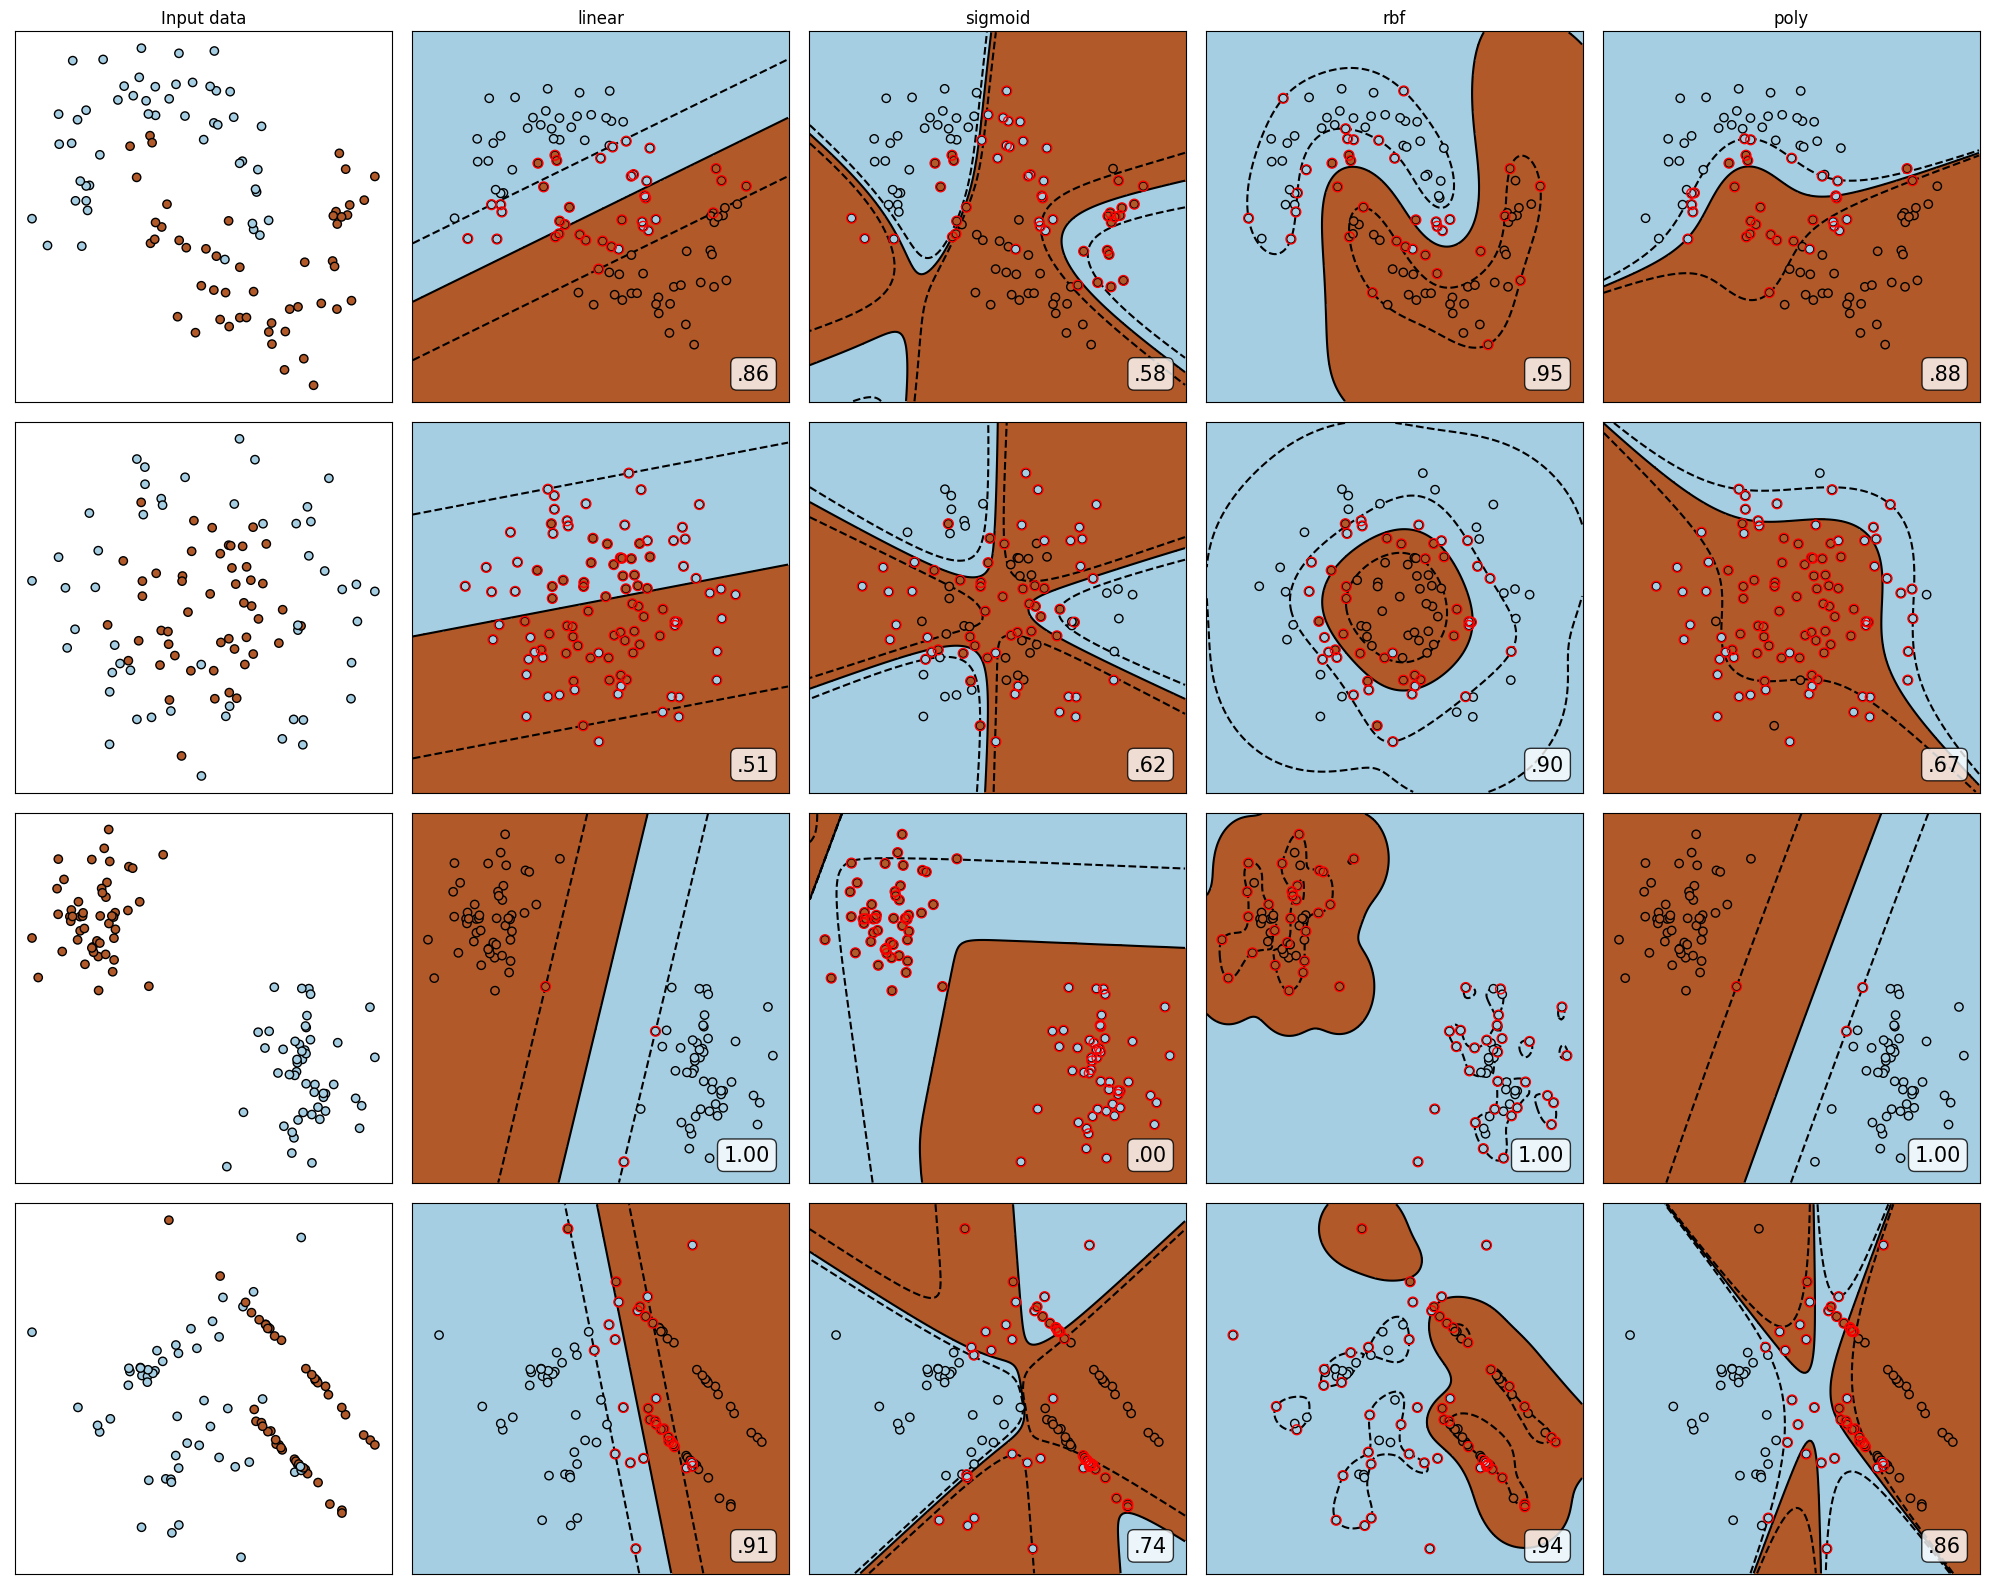

In [10]:
Kernel = ["linear","sigmoid","rbf","poly"]
nrows=len(datasets)
ncols=len(Kernel) + 1
 
fig, axes = plt.subplots(nrows, ncols,figsize=(20,16))

for ds_cnt, (X,Y) in enumerate(datasets):
    
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    
    for est_idx, kernel in enumerate(Kernel):
        
        # 子圖位置
        ax = axes[ds_cnt, est_idx + 1]
        
        # 建模
        clf = SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y)
        
        # 
        ax.scatter(X[:, 0], X[:, 1], c=Y
                   ,zorder=10
                   ,cmap=plt.cm.Paired,edgecolors='k')
        
        # 畫出支持向量
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
                    facecolors='none', zorder=10, edgecolors='red')
        
        # 畫出邊界
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        
        
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        
        ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        
        ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-1, 0, 1])
        
        ax.set_xticks(())
        ax.set_yticks(())
        
        
        if ds_cnt == 0:
            ax.set_title(kernel)
            
         
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0')
                , size=15
                , bbox=dict(boxstyle='round', alpha=0.8, facecolor='white')
                , transform=ax.transAxes 
                , horizontalalignment='right' 
               )
 
plt.tight_layout()
plt.show()

透過上述簡單的範例，可以發現當數據類型明顯不是線性可分時（月亮型與環形），採用RBF kernel的表現最好，而在數據較接近線性可分時，可以直接用線性SVM來分類也能得到不錯的效果，好處是線性SVM可以很直觀且不需要額外調整其他參數；令外，上圖中支持向量的樣本以紅色外框表示。

## SVM樣本不平衡問題
在分類問題中，正負類樣本不平衡的問題是必要解決的問題，舉例來說，當今天有100筆數據90筆正類，10筆負類，若我們什麼都不做，就直接把樣本當正類我們也能得到90%正確率的模型，顯然不合理，這時候，通常會採用某些方法生成增加負類的樣本量；不過，SVM模型中由於超平面參數$w,b$只由支持向量得到，因此我們生成增加的樣本，多數很有可能對超平面一點影響也沒有，很可能是個徒勞的方法，且SVM的計算時間較長，因此在SVM的框架中通常透過sklearn.svm.svc()中的class_weight參數，賦予各類別樣本不同的計算權重，如：直接設置balance（自動調整為負類：正類＝9:1）或設置{正類:權重1, 負類：權重2}，來解決樣本不平衡的問題。


順道一提，在上述的例子中，設置class_weight="balance"參數其實背後是將負類樣本的參數C乘以9，正類樣本的參數C乘以1，藉此讓模型對於把負類樣本分錯的狀況看得很重要。

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

In [12]:
# 創建不平衡的樣本，第一類有500個，第二類只有50個
class_1 = 500 
class_2 = 50 
centers = [[0.0, 0.0], [2.0, 2.0]] 
clusters_std = [1.5, 0.5] 
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

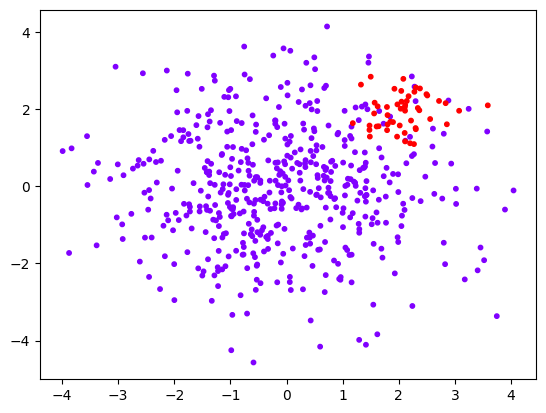

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10)
plt.show()

In [14]:
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

SVC(kernel='linear')

In [15]:
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

SVC(class_weight={1: 10}, kernel='linear')

In [16]:
print(clf.score(X,y))

wclf.score(X,y)

0.9418181818181818


0.9127272727272727

我們發現樣本加入權重平衡後，整體準確率下降了。

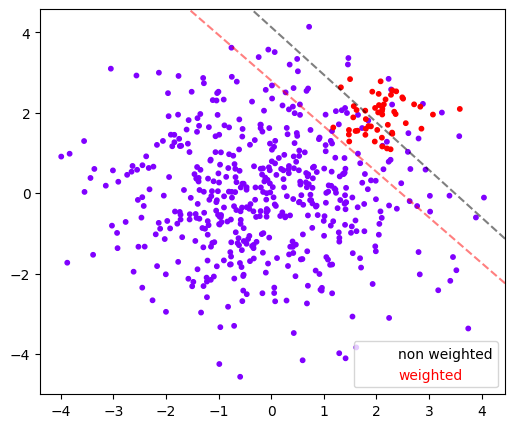

In [17]:
# 畫出上述兩種情況下的超平面

plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10)
ax = plt.gca() 

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z_clf = clf.decision_function(xy).reshape(XX.shape)
a = ax.contour(XX, YY, Z_clf, colors='black', levels=[0], alpha=0.5, linestyles=['--'])

Z_wclf = wclf.decision_function(xy).reshape(XX.shape)
b = ax.contour(XX, YY, Z_wclf, colors='red', levels=[0], alpha=0.5, linestyles=['--'])

plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="lower right",labelcolor=["black","red"])

plt.show()

In [18]:
# 計算加入權重後的召回率 紅色少數類在此為1
(y[y == wclf.predict(X)] == 1).sum()/(y == 1).sum()

1.0

In [19]:
# 計算不加入權重的召回率 紅色少數類在此為1
(y[y == clf.predict(X)] == 1).sum()/(y == 1).sum()

0.6

可以發現樣本加入權重後，如同更注重紅色樣本的分類正確性，超平面往左下移動，雖然犧牲了整體準確率，不過卻讓紅色樣本的分類準確率提高了，也就是讓召回率（Recall）提高了，這樣的設置在我們非常講求某一類分類正確率的情況下很實用。